# PHYS 105: Computational Physics I

## In-Class Exercise 6.1

### Name = Christopher Morris

In this exercise you will investigate the long-term behavior of the energy error in the two second-order schemes we have studied, 

    1. the analytic second-order scheme and

    2. the predictor-corrector scheme.

Consider the nonlinear oscillator with acceleration given by:

$$
        acc = -K x^3
$$
        
where $K = 4$, starting with $x(0) = 0$ and $v(0) = 1$ at time $t = 0$.


**Instructions**:

For each of the two schemes above:

   * **Plot** the trajectory $x(t)$ and the energy error $dE = E(t) - E(0)$ as functions of time for  $dt = 0.1$,  for  $0 \leq t \leq t_{max}$, where $t_{max} = 10, 100, 250$.   
   
   * **Discuss** what you notice about the long-term growth of the error in each scheme.



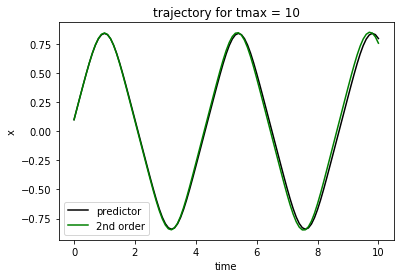

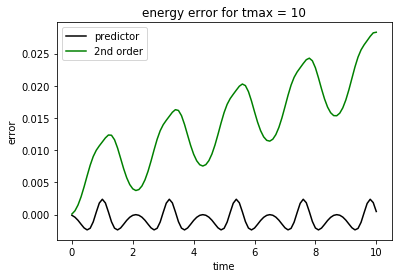

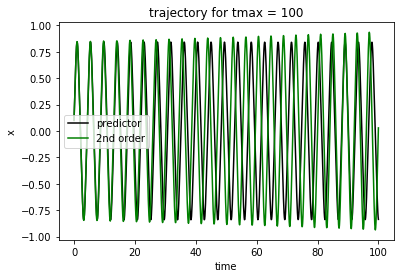

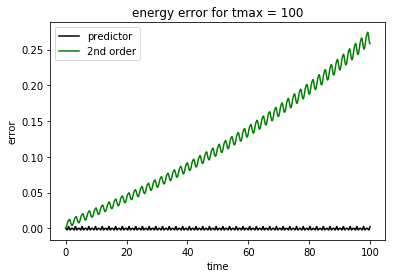

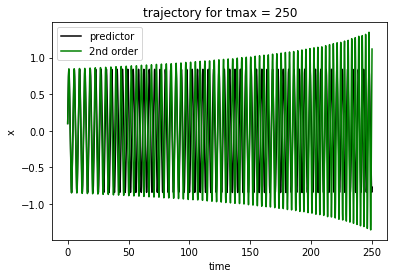

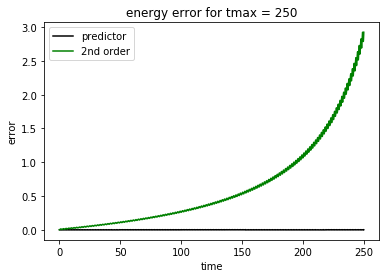

In [2]:
import sys, math
import matplotlib.pyplot as plt
import numpy as np

# FUNCTION DEFINITIONS ==============================

def interp(x0, y0, x1, y1, x=None, y=None):
    if y == None:
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    elif x == None:
        return (y-y0) * (x1 - x0) / (y1 - y0) + x0

# Particle Acceleration
def acc(x, v):
    return -K * x**3

def jerk(x, v):
    return -3*K*x**2 * v

# Potential - calculated from acceleration
def potential(x):
    return .25 * K * x**4

# Total Energy
def energy(x, v):
    Etot = potential(x) + 0.5*v*v
    return Etot

# Analytic Solution - from lecture
def analytic_soln(t):
    x = .5 * V0 * math.sin(2*t)
    v = V0 * math.cos(2*t)
    return x, v

def output(x, v, t):
#     Print numerical and analytical solutions and the energy error
#     to cout.
    #print ('{:5.3f} {:5.3f} {:5.3f} {:5.3f}'.format(t, x, analytic_soln(t)[0], energy(x, v) - E0))
    pass

def take_a_step_predictor_corrector(x, v, t, dt):
    
    # Set the acceleration.
    a = acc(x, v)

    # Take the time step.
    xp = x
    x += v*dt + 0.5*a*dt*dt
    vp = v + a*dt
    
    a_pred = acc(x, vp)
    v = vp + .5*(a_pred - a)*dt
    
    return xp, x, v, t

def take_a_step_2nd_analytic(x,v,t,dt):
    a = acc(x, v)
    j = jerk(x, v)
    
    xp = x
    x += v*dt + .5*a*dt*dt
    v += a*dt + .5*j*dt*dt

    return xp, x, v, t

def check_zero(xp, x, t):
    if len(zeros_list) == 0:
        if (xp < 0) and (x >= 0):
            zeros_list.append(interp(t-dt, xp, t, x, y=0))
        
# MAIN PROGRAM =====================================
t_list = [10,100,250]
# Define constants and initial conditions
for tmax in t_list:
    
    energy_list_2nd_order = []
    energy_list_predictor = []
    
    numerical_list_2nd_order = []
    numerical_list_predictor = []
    
    time_list = []
    
    DT = .1
    X0 = 0
    V0 = 1
    K  = 4

    # Initialize the system.

    t    = 0
    x    = X0
    xp   = x
    v    = V0
    dt   = DT
    tmax = tmax
    
    x_pred = x
    xp_pred = x
    v_pred = v
    
    x_2nd = x
    xp_2nd = x
    v_2nd = v

    # Initialize Plotting Lists

    # initial energy
    E0 = energy(x, v)
    dEmax_pred = 0
    dEmax_2nd  = 0
    
    while t <= tmax:
        
        
        (xp_pred, x_pred, v_pred, t) = take_a_step_predictor_corrector(x_pred, v_pred, t, dt)
        (xp_2nd, x_2nd, v_2nd, t)    =  take_a_step_2nd_analytic(x_2nd, v_2nd, t, dt)
        
        numerical_list_predictor.append(x_pred)
        numerical_list_2nd_order.append(x_2nd)
        time_list.append(t)
        
        #Compute the maximum error.
        dE_pred = energy(x_pred, v_pred) - E0
        dE_2nd  = energy(x_2nd,   v_2nd) - E0
                
        if abs(dE_pred) > dEmax_pred: 
             dEmax_pred = abs(dE_pred)
        
        if abs(dE_2nd) > dEmax_2nd: 
             dEmax_2nd = abs(dE_2nd)
            
        energy_list_predictor.append(dE_pred)
        energy_list_2nd_order.append(dE_2nd)

        t += dt

    # Summarize to stderr.

    #plt.subplot(2,3,t_list.index(tmax)+1)
    plt.figure()
    plt.plot(time_list, numerical_list_predictor, 'k-', label = 'predictor')
    plt.plot(time_list, numerical_list_2nd_order, 'g-', label = '2nd order')
    plt.xlabel('time')
    plt.ylabel('x')
    plt.title('trajectory for tmax = {}'.format(tmax))
    
    plt.legend()
    
    plt.figure()
    plt.plot(time_list, energy_list_predictor, 'k-', label = 'predictor')
    plt.plot(time_list, energy_list_2nd_order, 'g-', label = '2nd order')
    plt.xlabel('time')
    plt.ylabel('error')
    plt.title('energy error for tmax = {}'.format(tmax))
    
    plt.legend()
    